In [1]:
import numpy as np
import pandas as pd
import re

import seaborn as sns

%matplotlib inline 
# to display charts in jupyter notebook

Import raw datascrape file

In [2]:
pd.set_option('display.max_columns', None)

In [31]:
df_import01 = pd.read_csv(r'C:\Users\suhaib.qazi\Desktop\cf_1a.csv', encoding = "ISO-8859-1")
df_import02 = pd.read_csv(r'C:\Users\suhaib.qazi\Desktop\cf_1b.csv', encoding = "ISO-8859-1")
df_import03 = pd.read_csv(r'C:\Users\suhaib.qazi\Desktop\cf_1c.csv', encoding = "ISO-8859-1")
df_import04 = pd.read_csv(r'C:\Users\suhaib.qazi\Desktop\cf_1d.csv', encoding = "ISO-8859-1")
df_import05 = pd.read_csv(r'C:\Users\suhaib.qazi\Desktop\cf_1e.csv', encoding = "ISO-8859-1")
df_import06 = pd.read_csv(r'C:\Users\suhaib.qazi\Desktop\cf_1f.csv', encoding = "ISO-8859-1")
df_import07 = pd.read_csv(r'C:\Users\suhaib.qazi\Desktop\cf_1g.csv', encoding = "ISO-8859-1")
df_import08 = pd.read_csv(r'C:\Users\suhaib.qazi\Desktop\cf_1h.csv', encoding = "ISO-8859-1")
#df_import09 = pd.read_csv(r'C:\Users\suhaib.qazi\Desktop\cf_1test.csv', encoding = "ISO-8859-1")
#df_import10 = pd.read_csv(r'C:\Users\suhaib.qazi\Desktop\cf_1j.csv', encoding = "ISO-8859-1")
#df_import11 = pd.read_csv(r'C:\Users\suhaib.qazi\Desktop\cf_1k.csv', encoding = "ISO-8859-1")


In [32]:
frames = [df_import01, df_import02, df_import03, df_import04, df_import05, df_import06, df_import07, df_import08]

In [33]:
df = pd.concat(frames)

Drop itteration number - not used

In [36]:
df = df.drop(['Iter_Number'],axis=1)

In [37]:
df = df.reset_index(drop=True)

Titles include trailing spaces - so to make it easier to work with, get rid of these

In [38]:
df = df.rename(columns=lambda x: x.strip())

For all weight fields (olympic lifting + athlete weight) standardise into kg. If weight is in pounds, convert (mutliply by 0.45)

In [39]:
for col in ['Back Squat','Clean and Jerk','Deadlift','Snatch','Weight']:
#1. is it lb or kg?
    df[col+' met']=df[col].str.strip().str[-2:] 
#2. Create multipliers to convert numbers. As we are converting to kg, if measure is in kg then x1, else x0.45    
    df[col+' met'] = pd.to_numeric(df[col+' met'].replace('kg',1).replace('lb',0.453592), errors='coerce')
#3. convert measures to numbers (getting rid of metric: "kg" or "lb")
    df[col] = pd.to_numeric(df[col].str.strip().str[:-2], errors='coerce')
#4. multiple weight number by multiplier    
    df[col]=df[col]*df[col+' met']
    df[col]=df[col].round()
#5. get rid of multiplier column    
    del df[col+' met']

Convert yearly Open position to integers

In [40]:
#for the year columns
for col in df.iloc[:,12:22]:
#convert to string to get substrings
        df[col] = df[col].apply(str)
#convert column to numeric - after deleting last 2 characters        
        df[col] = pd.to_numeric(df[col].str.strip().str[:-2], errors='coerce').round()

Convert Height

In [41]:
#get rid of " (for inches) - this will allow us to split the inches into two list elements
df['Height'] = df['Height'].str.replace('"','')

function to convert - if list has two elements, in is ft/inches so convert to cm
if list is single item, get rid of 'cm'

In [42]:
def parse_height(x):
    feet_inches = x.split("'")
    if len(feet_inches) == 2:
        return 2.54 * (12 * int(feet_inches[0]) + float(feet_inches[1]))        
    else: return feet_inches[0][:-2] #list(map(int, results))
# Convert a height in inches to a height in centimeters

In [43]:
df['Height'] = pd.to_numeric(df['Height'].apply(parse_height))

In [44]:
#df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

In [45]:
def sec_converter(x):    
    min_sec_split = x.split(":")

    if len(min_sec_split) == 2:
        return int(min_sec_split[0])*60 + int(min_sec_split[1])
    else: return min_sec_split[0] 

In [46]:
for col in df:
    df[col] = df[col].replace('--', np.nan, regex=True)
    df[col] = df[col].replace(0, np.nan, regex=True)
    

In [47]:
for col in ['Filthy 50','Fran','Grace','Helen','Run 5k','Sprint 400m']:
    df[col] = df[col].apply(str)
    df[col] = df[col].apply(sec_converter)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [48]:
def gender(s):
    val = ''

    if any(word in str(s['Division']) for word in ['Women']):
        val = 'Female'
    elif any(word in str(s['Division']) for word in ['Men']):
        val = 'Male'
    else: val = None
    return val

In [49]:
df['gender']=df.apply(gender,axis=1)

Axes(0.125,0.125;0.775x0.755)


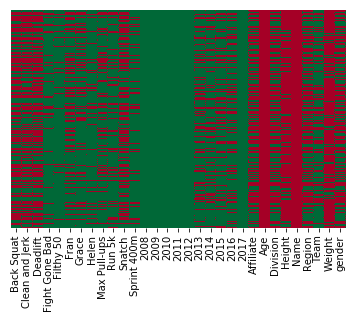

In [50]:
print(sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='RdYlGn'))

In [360]:
df_redu = df[df['2015'].notnull()]

In [361]:
columns = ['Fight Gone Bad','Filthy 50','Run 5k','Sprint 400m','2008','2009','2010','2011','2012','2017','Team','Affiliate','Division']
#columns = ['Affiliate','Division']
df_redu.drop(columns, inplace=True, axis=1)

C:\Users\suhaib.qazi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Axes(0.125,0.125;0.775x0.755)


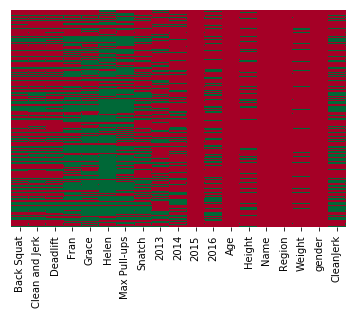

In [362]:
print(sns.heatmap(df_redu.isnull(),yticklabels=False,cbar=False,cmap='RdYlGn'))

In [363]:
df_redu.isnull().sum()/df_redu.shape[0]

Back Squat        0.369265
Clean and Jerk    0.374382
Deadlift          0.362016
Fran              0.546990
Grace             0.639604
Helen             0.739553
Max Pull-ups      0.651202
Snatch            0.386492
2013              0.305731
2014              0.246376
2015              0.000000
2016              0.300529
Age               0.000000
Height            0.151202
Name              0.000000
Region            0.000000
Weight            0.070015
gender            0.000853
CleanJerk         0.374382
dtype: float64

Notes:
    
I would not be in favour of imputing null values here as it could effect the model


Tried imputing Grace based on the C&J performances, Gender, Age, Weight

In [364]:
df_redu = df_redu[df_redu['Height'].notnull()]
df_redu = df_redu[df_redu['gender'].notnull()]
df_redu = df_redu[df_redu['Weight'].notnull()]


#df_redu = df_redu[df_redu['Back Squat'].notnull()]

In [365]:
df_redu['CleanJerk']=df_redu['Clean and Jerk']

In [366]:
CleanJerk_bins = [0, 50, 100, 150,200,250,300]
Weight_bins = [0,50,60,70,80,90,100,110,120,130,200,250,300,350]
Height_bins = [0,100,120,130,140,150,160,170,180,190,200,210,250,300]
Age_bins = [0,18,25,30,35,40,45,50,55,60,80]

bins = [0,18,25,30,35,40,45,50,55,60,70,80,90,100,110,120,130,200,250,300,350]

In [367]:
for col in ['Clean and Jerk','Weight','Height','Age']:
    #bins = col_bins
    df_redu[col+'_binned'] = pd.cut(df_redu[col], bins)
    df_redu[col+'_binned'] = df_redu[col+'_binned'].cat.add_categories(['z'])
    df_redu[col+'_binned'] = df_redu[col+'_binned'].fillna('z')



In [368]:
df_redu

,Back Squat,Clean and Jerk,Deadlift,Fran,Grace,Helen,Max Pull-ups,Snatch,2013,2014,2015,2016,Age,Height,Name,Region,Weight,gender,CleanJerk,Clean and Jerk_binned,Weight_binned,Height_binned,Age_binned
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1591.0,1414.0,902.0,696.0,47,167.64,Richard Neal,South Central,66.0,Male,NaN,z,"(60, 70]","(130, 200]","(45, 50]"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,NaN,1114.0,NaN,51,12.70,Todd Burgess,North West,81.0,Male,NaN,z,"(80, 90]","(0, 18]","(50, 55]"
4,134.0,102.0,211.0,172.0,179.0,421.0,50,75.0,NaN,21848.0,15971.0,12094.0,39,182.88,Matt DiMarco,North Central,86.0,Male,102.0,"(100, 110]","(80, 90]","(130, 200]","(35, 40]"
6,160.0,125.0,200.0,NaN,NaN,NaN,NaN,95.0,NaN,21165.0,6909.0,4968.0,32,190.00,Robson Silva,Latin America,93.0,Male,125.0,"(120, 130]","(90, 100]","(130, 200]","(30, 35]"
11,125.0,86.0,175.0,270.0,329.0,523.0,NaN,NaN,11385.0,16027.0,28304.0,25863.0,39,185.42,Eric Karls,Central East,79.0,Male,86.0,"(80, 90]","(70, 80]","(130, 200]","(35, 40]"
15,104.0,66.0,NaN,NaN,NaN,NaN,NaN,48.0,5277.0,8771.0,3729.0,4448.0,32,162.00,Giannina Dongo,Latin America,59.0,Female,66.0,"(60, 70]","(55, 60]","(130, 200]","(30, 35]"
17,NaN,67.0,95.0,330.0,321.0,NaN,10,50.0,10175.0,NaN,25251.0,35436.0,38,173.00,Claire Campbell,Australia,73.0,Female,67.0,"(60, 70]","(70, 80]","(130, 200]","(35, 40]"
25,93.0,77.0,125.0,212.0,188.0,541.0,46,57.0,2087.0,NaN,8841.0,4094.0,35,172.72,Erin Hathaway,South Central,62.0,Female,77.0,"(70, 80]","(60, 70]","(130, 200]","(30, 35]"
30,152.0,93.0,156.0,467.0,374.0,675.0,NaN,66.0,2877.0,4497.0,1764.0,1433.0,47,180.34,Ron Gross,North West,83.0,Male,93.0,"(90, 100]","(80, 90]","(130, 200]","(45, 50]"
36,84.0,57.0,107.0,NaN,NaN,NaN,NaN,36.0,2647.0,1046.0,3096.0,4937.0,46,165.10,Kim Colle,South Central,52.0,Female,57.0,"(55, 60]","(50, 55]","(130, 200]","(45, 50]"


df_redu.groupby(['Age','gender','Height','Clean and Jerk']).agg({ 'Grace': 'mean'})

In [369]:
med = df_redu.groupby(['Age_binned','gender','Height_binned','Weight_binned','Clean and Jerk_binned'])['Grace'].transform('mean')

df_redu['Grace_1'] = df_redu['Grace'].fillna(med)

In [370]:
df_redu

,Back Squat,Clean and Jerk,Deadlift,Fran,Grace,Helen,Max Pull-ups,Snatch,2013,2014,2015,2016,Age,Height,Name,Region,Weight,gender,CleanJerk,Clean and Jerk_binned,Weight_binned,Height_binned,Age_binned,Grace_1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1591.0,1414.0,902.0,696.0,47,167.64,Richard Neal,South Central,66.0,Male,NaN,z,"(60, 70]","(130, 200]","(45, 50]",NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,NaN,1114.0,NaN,51,12.70,Todd Burgess,North West,81.0,Male,NaN,z,"(80, 90]","(0, 18]","(50, 55]",NaN
4,134.0,102.0,211.0,172.0,179.0,421.0,50,75.0,NaN,21848.0,15971.0,12094.0,39,182.88,Matt DiMarco,North Central,86.0,Male,102.0,"(100, 110]","(80, 90]","(130, 200]","(35, 40]",179.000000
6,160.0,125.0,200.0,NaN,NaN,NaN,NaN,95.0,NaN,21165.0,6909.0,4968.0,32,190.00,Robson Silva,Latin America,93.0,Male,125.0,"(120, 130]","(90, 100]","(130, 200]","(30, 35]",144.333333
11,125.0,86.0,175.0,270.0,329.0,523.0,NaN,NaN,11385.0,16027.0,28304.0,25863.0,39,185.42,Eric Karls,Central East,79.0,Male,86.0,"(80, 90]","(70, 80]","(130, 200]","(35, 40]",329.000000
15,104.0,66.0,NaN,NaN,NaN,NaN,NaN,48.0,5277.0,8771.0,3729.0,4448.0,32,162.00,Giannina Dongo,Latin America,59.0,Female,66.0,"(60, 70]","(55, 60]","(130, 200]","(30, 35]",237.760000
17,NaN,67.0,95.0,330.0,321.0,NaN,10,50.0,10175.0,NaN,25251.0,35436.0,38,173.00,Claire Campbell,Australia,73.0,Female,67.0,"(60, 70]","(70, 80]","(130, 200]","(35, 40]",321.000000
25,93.0,77.0,125.0,212.0,188.0,541.0,46,57.0,2087.0,NaN,8841.0,4094.0,35,172.72,Erin Hathaway,South Central,62.0,Female,77.0,"(70, 80]","(60, 70]","(130, 200]","(30, 35]",188.000000
30,152.0,93.0,156.0,467.0,374.0,675.0,NaN,66.0,2877.0,4497.0,1764.0,1433.0,47,180.34,Ron Gross,North West,83.0,Male,93.0,"(90, 100]","(80, 90]","(130, 200]","(45, 50]",374.000000
36,84.0,57.0,107.0,NaN,NaN,NaN,NaN,36.0,2647.0,1046.0,3096.0,4937.0,46,165.10,Kim Colle,South Central,52.0,Female,57.0,"(55, 60]","(50, 55]","(130, 200]","(45, 50]",213.000000


In [371]:
df_redu.isnull().sum()/df_redu.shape[0]

Back Squat               0.272119
Clean and Jerk           0.277452
Deadlift                 0.264066
Fran                     0.468312
Grace                    0.578122
Helen                    0.691487
Max Pull-ups             0.587534
Snatch                   0.290107
2013                     0.288433
2014                     0.226208
2015                     0.000000
2016                     0.280799
Age                      0.000000
Height                   0.000000
Name                     0.000000
Region                   0.000000
Weight                   0.000000
gender                   0.000000
CleanJerk                0.277452
Clean and Jerk_binned    0.000000
Weight_binned            0.000000
Height_binned            0.000000
Age_binned               0.000000
Grace_1                  0.106568
dtype: float64

Axes(0.125,0.125;0.775x0.755)


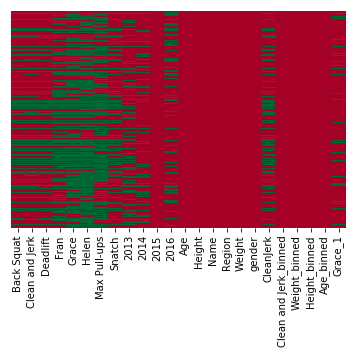

In [372]:
print(sns.heatmap(df_redu.isnull(),yticklabels=False,cbar=False,cmap='RdYlGn'))

In [373]:
med2 = df_redu.groupby(['Age_binned','gender','Height_binned','Weight_binned','Clean and Jerk_binned'])['Fran'].transform('mean')

df_redu['Fran_1'] = df_redu['Fran'].fillna(med2)

In [374]:
df_redu.isnull().sum()/df_redu.shape[0]

Back Squat               0.272119
Clean and Jerk           0.277452
Deadlift                 0.264066
Fran                     0.468312
Grace                    0.578122
Helen                    0.691487
Max Pull-ups             0.587534
Snatch                   0.290107
2013                     0.288433
2014                     0.226208
2015                     0.000000
2016                     0.280799
Age                      0.000000
Height                   0.000000
Name                     0.000000
Region                   0.000000
Weight                   0.000000
gender                   0.000000
CleanJerk                0.277452
Clean and Jerk_binned    0.000000
Weight_binned            0.000000
Height_binned            0.000000
Age_binned               0.000000
Grace_1                  0.106568
Fran_1                   0.068396
dtype: float64

In [375]:
columns = ['Helen','Grace','Fran']
#columns = ['Affiliate','Division']
df_redu.drop(columns, inplace=True, axis=1)

In [376]:
df_redu.isnull().sum()/df_redu.shape[0]

Back Squat               0.272119
Clean and Jerk           0.277452
Deadlift                 0.264066
Max Pull-ups             0.587534
Snatch                   0.290107
2013                     0.288433
2014                     0.226208
2015                     0.000000
2016                     0.280799
Age                      0.000000
Height                   0.000000
Name                     0.000000
Region                   0.000000
Weight                   0.000000
gender                   0.000000
CleanJerk                0.277452
Clean and Jerk_binned    0.000000
Weight_binned            0.000000
Height_binned            0.000000
Age_binned               0.000000
Grace_1                  0.106568
Fran_1                   0.068396
dtype: float64

In [377]:
df_redu = df_redu[df_redu['Back Squat'].notnull()]

In [378]:
df_redu.isnull().sum()/df_redu.shape[0]

Back Squat               0.000000
Clean and Jerk           0.038649
Deadlift                 0.019397
Max Pull-ups             0.449856
Snatch                   0.053592
2013                     0.276868
2014                     0.205029
2015                     0.000000
2016                     0.264799
Age                      0.000000
Height                   0.000000
Name                     0.000000
Region                   0.000000
Weight                   0.000000
gender                   0.000000
CleanJerk                0.038649
Clean and Jerk_binned    0.000000
Weight_binned            0.000000
Height_binned            0.000000
Age_binned               0.000000
Grace_1                  0.048707
Fran_1                   0.036782
dtype: float64

In [379]:
columns = ['2013','2014','2016','Max Pull-ups']
#columns = ['Affiliate','Division']
df_redu.drop(columns, inplace=True, axis=1)

C:\Users\suhaib.qazi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [380]:
df_redu.isnull().sum()/df_redu.shape[0]

Back Squat               0.000000
Clean and Jerk           0.038649
Deadlift                 0.019397
Snatch                   0.053592
2015                     0.000000
Age                      0.000000
Height                   0.000000
Name                     0.000000
Region                   0.000000
Weight                   0.000000
gender                   0.000000
CleanJerk                0.038649
Clean and Jerk_binned    0.000000
Weight_binned            0.000000
Height_binned            0.000000
Age_binned               0.000000
Grace_1                  0.048707
Fran_1                   0.036782
dtype: float64

In [381]:
med = df_redu.groupby(['Age_binned','gender','Height_binned','Weight_binned'])['Snatch'].transform('mean')

df_redu['Snatch_1'] = df_redu['Snatch'].fillna(med)

C:\Users\suhaib.qazi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [382]:
df_redu.isnull().sum()/df_redu.shape[0]

Back Squat               0.000000
Clean and Jerk           0.038649
Deadlift                 0.019397
Snatch                   0.053592
2015                     0.000000
Age                      0.000000
Height                   0.000000
Name                     0.000000
Region                   0.000000
Weight                   0.000000
gender                   0.000000
CleanJerk                0.038649
Clean and Jerk_binned    0.000000
Weight_binned            0.000000
Height_binned            0.000000
Age_binned               0.000000
Grace_1                  0.048707
Fran_1                   0.036782
Snatch_1                 0.001437
dtype: float64

In [383]:
df_redu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6960 entries, 4 to 43160
Data columns (total 19 columns):
Back Squat               6960 non-null float64
Clean and Jerk           6691 non-null float64
Deadlift                 6825 non-null float64
Snatch                   6587 non-null float64
2015                     6960 non-null float64
Age                      6960 non-null int64
Height                   6960 non-null float64
Name                     6960 non-null object
Region                   6960 non-null object
Weight                   6960 non-null float64
gender                   6960 non-null object
CleanJerk                6691 non-null float64
Clean and Jerk_binned    6960 non-null category
Weight_binned            6960 non-null category
Height_binned            6960 non-null category
Age_binned               6960 non-null category
Grace_1                  6621 non-null float64
Fran_1                   6704 non-null float64
Snatch_1                 6950 non-null float64


In [384]:
df_redu = df_redu[df_redu['Snatch'].notnull()]

In [385]:
df_redu.isnull().sum()/df_redu.shape[0]

Back Squat               0.000000
Clean and Jerk           0.015030
Deadlift                 0.014574
Snatch                   0.000000
2015                     0.000000
Age                      0.000000
Height                   0.000000
Name                     0.000000
Region                   0.000000
Weight                   0.000000
gender                   0.000000
CleanJerk                0.015030
Clean and Jerk_binned    0.000000
Weight_binned            0.000000
Height_binned            0.000000
Age_binned               0.000000
Grace_1                  0.041901
Fran_1                   0.032336
Snatch_1                 0.000000
dtype: float64

In [386]:
df_redu = df_redu[df_redu['Grace_1'].notnull()]

In [387]:
df_redu.isnull().sum()/df_redu.shape[0]

Back Squat               0.000000
Clean and Jerk           0.013469
Deadlift                 0.014895
Snatch                   0.000000
2015                     0.000000
Age                      0.000000
Height                   0.000000
Name                     0.000000
Region                   0.000000
Weight                   0.000000
gender                   0.000000
CleanJerk                0.013469
Clean and Jerk_binned    0.000000
Weight_binned            0.000000
Height_binned            0.000000
Age_binned               0.000000
Grace_1                  0.000000
Fran_1                   0.010616
Snatch_1                 0.000000
dtype: float64

In [388]:
df_redu = df_redu[df_redu['Clean and Jerk'].notnull()]

In [389]:
df_redu.isnull().sum()/df_redu.shape[0]

Back Squat               0.000000
Clean and Jerk           0.000000
Deadlift                 0.013813
Snatch                   0.000000
2015                     0.000000
Age                      0.000000
Height                   0.000000
Name                     0.000000
Region                   0.000000
Weight                   0.000000
gender                   0.000000
CleanJerk                0.000000
Clean and Jerk_binned    0.000000
Weight_binned            0.000000
Height_binned            0.000000
Age_binned               0.000000
Grace_1                  0.000000
Fran_1                   0.010119
Snatch_1                 0.000000
dtype: float64

In [390]:
df_redu.shape

(6226, 19)

In [391]:
df_redu['Deadlift'].fillna(df_redu['Deadlift'].mean(),inplace=True)

In [392]:
df_redu.isnull().sum()/df_redu.shape[0]

Back Squat               0.000000
Clean and Jerk           0.000000
Deadlift                 0.000000
Snatch                   0.000000
2015                     0.000000
Age                      0.000000
Height                   0.000000
Name                     0.000000
Region                   0.000000
Weight                   0.000000
gender                   0.000000
CleanJerk                0.000000
Clean and Jerk_binned    0.000000
Weight_binned            0.000000
Height_binned            0.000000
Age_binned               0.000000
Grace_1                  0.000000
Fran_1                   0.010119
Snatch_1                 0.000000
dtype: float64

In [393]:
df_redu['Fran_1'].fillna(df_redu['Fran_1'].mean(),inplace=True)

In [394]:
df_redu.isnull().sum()/df_redu.shape[0]

Back Squat               0.0
Clean and Jerk           0.0
Deadlift                 0.0
Snatch                   0.0
2015                     0.0
Age                      0.0
Height                   0.0
Name                     0.0
Region                   0.0
Weight                   0.0
gender                   0.0
CleanJerk                0.0
Clean and Jerk_binned    0.0
Weight_binned            0.0
Height_binned            0.0
Age_binned               0.0
Grace_1                  0.0
Fran_1                   0.0
Snatch_1                 0.0
dtype: float64

In [395]:
df_redu.shape

(6226, 19)

In [396]:
df_redu.columns.unique()

Index(['Back Squat', 'Clean and Jerk', 'Deadlift', 'Snatch', '2015', 'Age',
       'Height', 'Name', 'Region', 'Weight', 'gender', 'CleanJerk',
       'Clean and Jerk_binned', 'Weight_binned', 'Height_binned', 'Age_binned',
       'Grace_1', 'Fran_1', 'Snatch_1'],
      dtype='object')

In [397]:
cols = ['Clean and Jerk_binned','Weight_binned','Height_binned','Age_binned']

df_redu.drop(cols, inplace=True, axis=1)

In [398]:
df_redu_dumy = pd.get_dummies(df_redu['gender'])
#df_redu_dumy2 = pd.get_dummies(df_redu['Region'])


In [555]:
df_redu_2 = df_redu.join(df_redu_dumy)

In [556]:
df_redu_2 = df_redu_2[df_redu_2['2015'] < 1000]

In [557]:
# calculate the correlation matrix
corr = df_redu.corr()


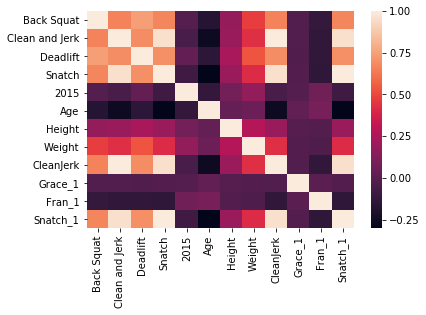

In [558]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [559]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve

In [581]:
cols3 = ['Back Squat','Deadlift','Age','Weight','Female','Clean and Jerk']

Z = df_redu_2[cols3]

y = Z['Clean and Jerk']

X = Z[['Back Squat','Deadlift','Age','Weight','Female']]

In [532]:
#X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 101)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)

# Linear Regression

In [535]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [536]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for Back Squat is 0.38091787363266216
The coefficient for Deadlift is 0.055938167731523686
The coefficient for Age is -0.9455969539646172
The coefficient for Weight is 0.20406102982599003
The coefficient for Female is -10.777447167274032


In [537]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 64.46911271989269


In [538]:
regression_model.score(X_test, y_test)

0.19673392234788323

In [539]:
from sklearn.metrics import mean_squared_error
import math

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

math.sqrt(regression_model_mse)

69.73457050042862

# Random Forest

In [534]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)
print ("Random Forest Model accuracy : {}".format(accuracy_score(y_test,prediction)))

Random Forest Model accuracy : 0.07712082262210797


# Random Forest 2 - with One Hot Encoding

In [533]:

n_estimator = 10

#Supervised transformation based on random forests
rf = RandomForestClassifier()
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

prediction = rf.predict(X_test)
print ("Random Forest Model accuracy : {}".format(accuracy_score(y_test,prediction)))

#y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
#fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)
#y_pred_rf_lm

Random Forest Model accuracy : 0.08483290488431877
